In [42]:
# Preliminary setup
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import zipfile
import os
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex



In [91]:
all = pd.read_pickle("alldata_clean.pickle")
df = pd.DataFrame(all[['sub2']])

In [122]:
# Import dataset from df.pickle
df['month'] = df.index.month
df['year'] = df.index.year.astype('category')
df['doy'] = df.index.dayofyear.astype('category')
df['dow'] = df.index.dayofweek.astype('category')

# Alpha categories are easier to color than numerics
df['adow'] = df.dow.apply(lambda x: 'd'+str(x))
df['ayear'] = df.year.apply(lambda x: 'y'+str(x))

# Count months in study
start = df.index.min() 
df['td'] = df.index - start
df['months'] = (df.td / np.timedelta64(1, 'M')).astype(int)

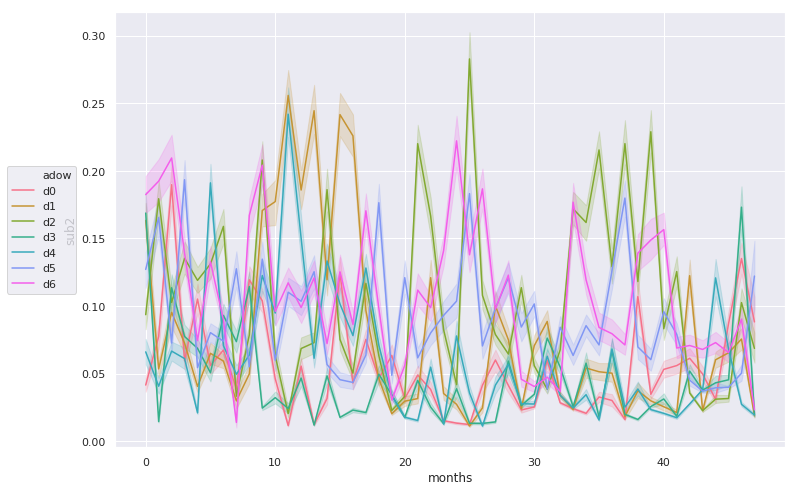

In [137]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x="months", y="sub2"
                  #, data=df[(df.doy==1)]
                  , data=df
                  , hue='adow'
                  #, color = sns.color_palette("husl",5)
                  , ax=ax
                 )
leg = ax.legend(bbox_to_anchor=(-.05,.5), loc="center right")
